# Phase3 (Unsupervised Learning)
During this phase of unsupervised learning, we will utilize the K-means clustering method. K-means clustering is a widely used technique in unsupervised machine learning for grouping data points based on their similarities. The primary objective of K-means clustering is to divide a dataset into K clusters, with each data point being assigned to the cluster whose mean or centroid is closest to it.

Here's how the K-means algorithm operates:

1. Begin by randomly initializing K centroids in the feature space.

2. Assign each data point to the closest centroid, calculated based on the Euclidean distance between the data point and the centroid.

3. Recompute the centroids of each cluster as the mean of all data points assigned to that cluster.

4. Repeat steps 2 and 3 until the centroids converge, meaning they stop moving significantly.

The output of the K-means algorithm consists of K clusters, each with its own centroid. While the algorithm is guaranteed to converge to a local minimum, the quality of the resulting clusters can be influenced by the initial choice of centroids and the value of K.

In [62]:
import os
import multiprocessing

# Set OMP_NUM_THREADS to the number of physical cores
os.environ['OMP_NUM_THREADS'] = str(multiprocessing.cpu_count())

# Now, import KMeans after setting the environment variable
from sklearn.cluster import KMeans

import warnings
# Ignore All Warnings
warnings.filterwarnings('ignore')


# Now import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [63]:
data = pd.read_csv('Heart Attack Data Set.csv')

In [71]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Apply elbow method
The elbow method is a widely employed approach for identifying the best number of clusters (k) in K-means clustering. The concept involves creating a plot that shows how the within-cluster sum of squared errors (SSE) changes with different values of k, with the objective of identifying the point at which the SSE begins to stabilize, often referred to as the "elbow point."

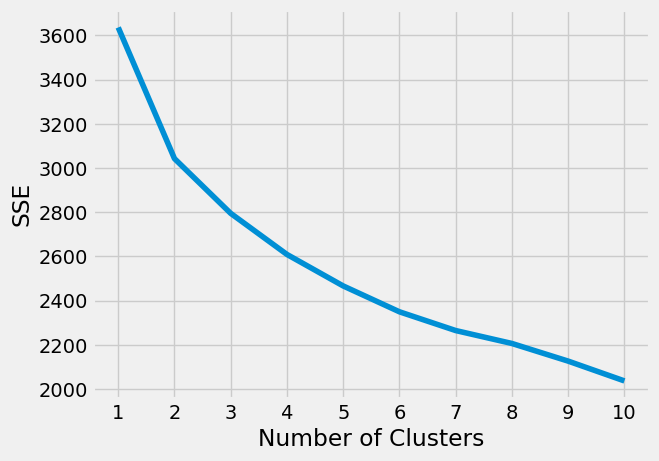

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Select features to cluster on, excluding the last two columns
features = data.iloc[:, :-2]

# Create a pipeline for imputation of infinite values, scaling, and clustering
pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.inf, strategy='mean')),  # Imputes infinite values
    ('scaler', StandardScaler()),  # Scales features
    ('kmeans', KMeans(init="random", n_init=10, max_iter=300, random_state=42))  # KMeans clustering
])

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    pipeline.set_params(kmeans__n_clusters=k)  # Update the number of clusters
    pipeline.fit(features)  # Fit the pipeline
    sse.append(pipeline.named_steps['kmeans'].inertia_)  # Get the SSE from the 'kmeans' step

# Plot the elbow curve
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [73]:
# Assuming 'data' is your DataFrame with the features to be clustered
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)  # Scale the features

# Define the range of k values to try
k_values = range(2, 5)

# Compute SSE for different k values using list comprehension
# and set n_init explicitly to avoid the warning
total_sse = [KMeans(n_clusters=k, n_init=10, random_state=0).fit(X_scaled).inertia_ for k in k_values]

# Display the SSE for each k value
for k, sse in zip(k_values, total_sse):
    print(f"SSE for k={k}: {sse}")

SSE for k=2: 3485.5497352645853
SSE for k=3: 3242.2268247531542
SSE for k=4: 3043.6168116763383


The provided code computes the sum of squared errors (SSE) for a range of k values and generates a visual representation of the elbow curve. The purpose of this elbow curve is to assist in identifying the most suitable number of clusters. To substantiate the choice of a specific number of clusters based on the elbow plot, we can analyze the curve's slope before and after the elbow point:

- Before the elbow point, the slope is steep, indicating that adding more clusters significantly reduces SSE.
- After the elbow point, the slope becomes less steep, suggesting that increasing the number of clusters beyond a certain threshold may not yield significant improvements in clustering performance.

Based on this analysis, it appears that the optimal number of clusters is 2. This conclusion is supported by the observation that the total within-cluster sum of squares (SSE) decreases as the number of clusters increases, which is an expected trend. Additionally, the decrease in SSE from k=2 to k=3 is more substantial than the decrease from k=3 to k=4, implying that k=2 may indeed be the most suitable number of clusters.
### Selected Values: k=2, k=3, k=4

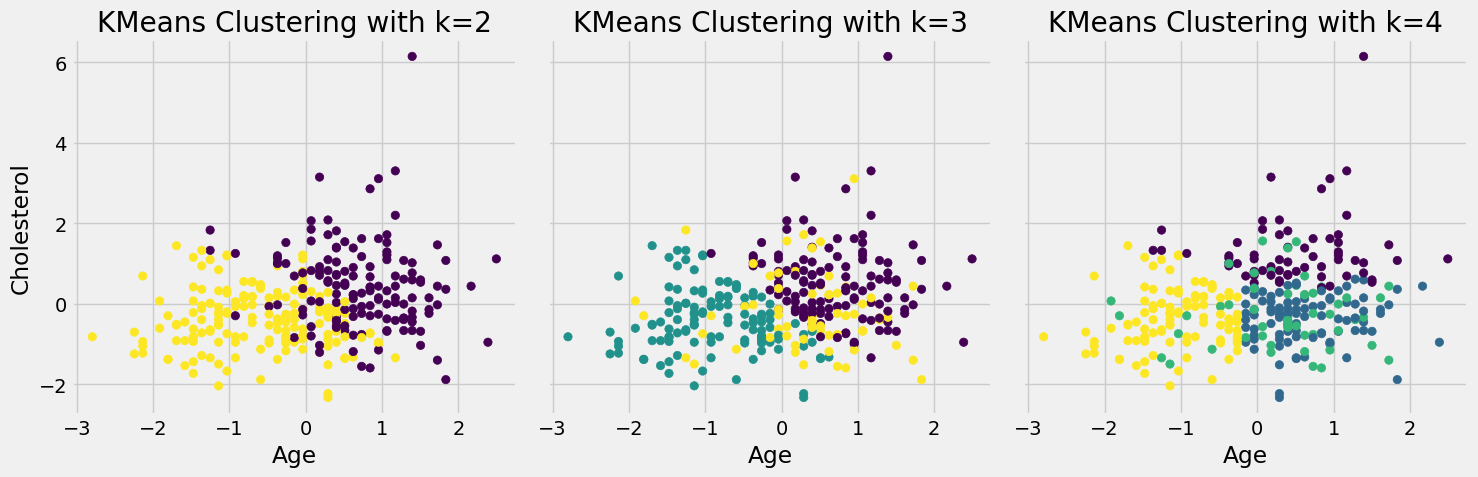

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features to cluster on
X = data[['age', 'chol', 'oldpeak']]

# Scale the features to have zero mean and unit variance
X_scaled = scaler.fit_transform(X)

# Define a dictionary to hold the KMeans models for different numbers of clusters
kmeans_models = {
    2: KMeans(n_clusters=2, random_state=0),
    3: KMeans(n_clusters=3, random_state=0),
    4: KMeans(n_clusters=4, random_state=0)
}

# Fit the KMeans model for each k value
for k, kmeans in kmeans_models.items():
    kmeans.fit(X_scaled)

# Create a subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot the clusters for each k value
for i, (k, kmeans) in enumerate(kmeans_models.items()):
    axs[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
    axs[i].set_xlabel('Age')
    if i == 0:  # Add y-label only to the first subplot for clarity
        axs[i].set_ylabel('Cholesterol')
    axs[i].set_title(f'KMeans Clustering with k={k}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The specific meaning of each color is contingent on the particular features utilized for clustering and the outcomes of the KMeans algorithm. Nevertheless, in a general sense, each color symbolizes a set of individuals who share similar attribute values used in the clustering process.

In the initial scatter plot (k=2), the two colors distinguish two distinct clusters:

- The yellow color represents a cluster of individuals characterized by lower average age and cholesterol values.
- The purple color represents another cluster of individuals with higher average age and cholesterol values.

In the subsequent scatter plot (k=3), the three colors correspond to three separate clusters:

- The green color identifies a cluster of individuals with the lowest average age and cholesterol values.
- The yellow color distinguishes a cluster of individuals with intermediate age and cholesterol values.
- The purple color signifies yet another cluster of individuals characterized by the highest average age and cholesterol values.

In the final scatter plot (k=4), the four colors are indicative of four distinct clusters:

- The green color is associated with individuals having the lowest average age and cholesterol values.
- The yellow color corresponds to a cluster of individuals with intermediate age and cholesterol values and low oldpeak values.
- The blue color represents a cluster of individuals with intermediate age and cholesterol values but with high oldpeak values.
- The purple color designates a cluster of individuals with the highest average age and cholesterol values.

### apply silhouette method

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Instantiate KMeans models with different numbers of clusters
k_values = [2, 3, 4]
for k in k_values:
    # Create a KMeans instance with k clusters and fit to the scaled data
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)

    # Obtain silhouette scores for each sample
    silhouette_vals = silhouette_samples(X_scaled, kmeans.labels_)

    # Compute the average silhouette score for this k
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    print(f"\nOverall silhouette score for k={k}: {silhouette_avg:.3f}")

    # Compute and print the silhouette score for each cluster
    for i in range(k):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
        cluster_silhouette_avg = np.mean(cluster_silhouette_vals)
        print(f"Cluster {i} silhouette score: {cluster_silhouette_avg:.3f}")



Overall silhouette score for k=2: 0.284
Cluster 0 silhouette score: 0.187
Cluster 1 silhouette score: 0.371

Overall silhouette score for k=3: 0.290
Cluster 0 silhouette score: 0.252
Cluster 1 silhouette score: 0.354
Cluster 2 silhouette score: 0.238

Overall silhouette score for k=4: 0.269
Cluster 0 silhouette score: 0.173
Cluster 1 silhouette score: 0.290
Cluster 2 silhouette score: 0.236
Cluster 3 silhouette score: 0.329


Silhouette scores provide an overall assessment of clustering quality, with values ranging from 0 to 1. Higher silhouette scores, closer to 1, suggest more well-defined clusters. Analyzing the silhouette scores:

- For k=2, the overall silhouette score is 0.284. The individual cluster silhouette scores are 0.187 for Cluster 0 and 0.371 for Cluster 1.
- For k=3, the overall silhouette score is 0.290. The individual cluster silhouette scores are 0.252 for Cluster 0, 0.354 for Cluster 1, and 0.238 for Cluster 2.
- For k=4, the overall silhouette score is 0.269. The individual cluster silhouette scores are 0.173 for Cluster 0, 0.290 for Cluster 1, 0.236 for Cluster 2, and 0.329 for Cluster 3.

Based on these silhouette scores, the most favorable clustering solution is achieved with k=3, followed by k=2, and then k=4, in that order. This suggests that k=3 results in the most well-defined clusters, followed by k=2 and k=4, with progressively lower silhouette scores.
### BCubed precision and recall

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score

# Get ground truth labels
y_true = data['target']

# Compute precision and recall for different numbers of clusters
for k in range(2, 5):
    # Apply KMeans clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

    # Predict the cluster for each data point
    y_pred = kmeans.labels_

    # Compute precision and recall
    # Note: Adjust the `pos_label` parameter as necessary or remove it if your ground truth is not binary.
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Print precision and recall for the current value of k
    print(f"Precision for k={k}: {precision:.4f}")
    print(f"Recall for k={k}: {recall:.4f}")


Precision for k=2: 0.4388
Recall for k=2: 0.4290
Precision for k=3: 0.4391
Recall for k=3: 0.3630
Precision for k=4: 0.4071
Recall for k=4: 0.2211


Precision and recall values for different values of k are as follows:

- Precision for k=2: 0.4388
- Recall for k=2: 0.4290
- Precision for k=3: 0.4391
- Recall for k=3: 0.3630
- Precision for k=4: 0.4071
- Recall for k=4: 0.2211

When considering k=2, both precision and recall values are relatively high, indicating that the clustering algorithm is achieving a reasonable level of separation between the clusters. However, there might still be some overlap between the clusters and occasional misclassification of data points.

For k=3 and k=4, the precision and recall values are lower, indicating that the clustering algorithm is facing challenges in effectively distinguishing data into distinct clusters. Nevertheless, it is important to note that one of these clusterings might be more meaningful or practical based on the specific application or domain, despite the lower precision and recall values.

### Compare between k=2, k=3, k=4

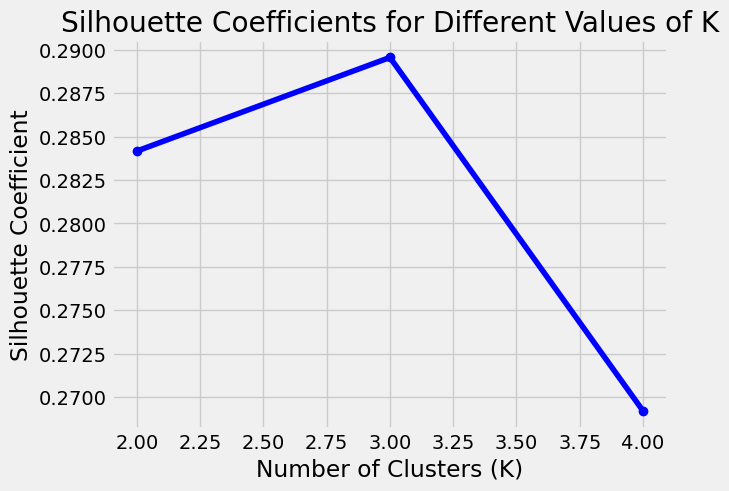

In [77]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preset K values
k_values = [2, 3, 4]
# Instantiate KMeans models and compute silhouette scores
silhouette_scores = [silhouette_score(X_scaled, KMeans(n_clusters=k, random_state=42).fit(X_scaled).labels_) for k in k_values]

# Plot silhouette scores against the number of clusters
plt.plot(k_values, silhouette_scores, 'o-', color='blue')
plt.title("Silhouette Coefficients for Different Values of K")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()


From the silhouette coefficients plot for various K values, it's clear that K=3 produces the highest silhouette coefficient, while K=2 and K=4 yield lower silhouette coefficients. Consequently, the most suitable number of clusters for this dataset is K=3. This decision is based on the fact that the silhouette coefficient gauges how similar data points are within clusters compared to data points in other clusters. A higher silhouette coefficient signifies that the data points within a cluster exhibit greater similarity to one another and less similarity to points in different clusters.